In [1]:
# Dependencies

import numpy as np
import pandas as pd

# Python SQL toolkit and Object Relational Mapper

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model

Base = automap_base()

# reflect the tables

Base.prepare(engine, reflect=True)

# Save references to each table

Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB

session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.

from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 

june_results = []

june_results = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==6).all()


In [5]:
#  3. Convert the June temperatures to a list.

june_temps = list(np.ravel(june_results))

In [6]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 

june_temps_df = pd.DataFrame(june_results, columns = ['date', 'June Temps'])
june_temps_df.set_index(june_temps_df['date'], inplace = True)

In [7]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.

june_temps_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [8]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.

dec_results = []

dec_results = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==12).all()


In [9]:
# 7. Convert the December temperatures to a list.

dec_temps = list(np.ravel(dec_results))

In [10]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 

dec_temps_df = pd.DataFrame(dec_results, columns = ['date','Dec Temps'])

dec_temps_df.set_index(dec_temps_df['date'], inplace = True)

In [11]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_temps_df.describe()

,Dec Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


### D3: Determine the summary statistics for rain for June

In [12]:
june_rain = []

june_rain = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date)==6).all()

june_precip = list(np.ravel(june_rain))

june_precip_df = pd.DataFrame(june_rain, columns = ['date', 'June Precip'])

june_precip_df.set_index(june_precip_df['date'], inplace = True)

june_precip_df.describe()

,June Precip
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


### D3: Determine the summary statistis for rain for December

In [13]:
dec_rain = []

dec_rain = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date)==12).all()

dec_precip = list(np.ravel(dec_rain))

dec_precip_df = pd.DataFrame(dec_rain, columns = ['date', 'Dec Precip'])

dec_precip_df.set_index(dec_precip_df['date'], inplace = True)

dec_precip_df.describe()



,Dec Precip
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


### D3: Examining summary stats by station

In [14]:
import matplotlib.pyplot as plt


       station  minimum temp  maximum temp  average temp
0  USC00511918          66.0          85.0     74.139394
1  USC00513117          68.0          83.0     74.050847
2  USC00514830          67.0          81.0     76.005376
3  USC00516128          66.0          79.0     71.937220
4  USC00517948          64.0          82.0     76.655405
5  USC00518838          67.0          78.0     73.394737
6  USC00519281          65.0          82.0     73.271186
7  USC00519397          70.0          84.0     77.559322
8  USC00519523          71.0          82.0     76.668103


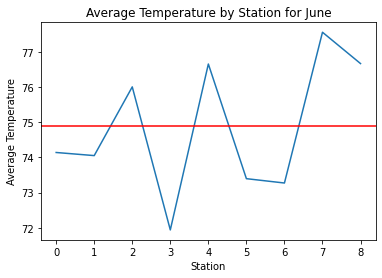

In [22]:
june_temp_station = []

june_temp_station = session.query(Measurement.station, func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
group_by(Measurement.station).filter(extract('month', Measurement.date)==6).all()

# Save the query results as a Pandas DataFrame and set the index to the date column

june_temp_station_df = pd.DataFrame(june_temp_station, columns = ['station', 'minimum temp', 'maximum temp', 'average temp'])

print(june_temp_station_df)

x_axis = np.arange(len(june_temp_station_df))
plt.plot(x_axis, june_temp_station_df['average temp'])
plt.xlabel("Station")
plt.ylabel("Average Temperature")
plt.title ("Average Temperature by Station for June")

#f, (ax1, ax2)=plt.subplots(1, 2, sharey=True)
#ax1.plot(x_axis, june_temp_station_df['average temp'])
plt.axhline(y=74.9, color='r', linestyle='-')

plt.savefig("Resources/Station_Temp_June")



       station  minimum temp  maximum temp  average temp
0  USC00511918          57.0          81.0     69.684211
1  USC00513117          63.0          80.0     71.069444
2  USC00514830          62.0          79.0     73.224719
3  USC00516128          60.0          83.0     69.291262
4  USC00517948          64.0          82.0     71.834862
5  USC00518838          63.0          78.0     72.421053
6  USC00519281          58.0          79.0     69.903226
7  USC00519397          56.0          77.0     71.109524
8  USC00519523          56.0          79.0     72.433333


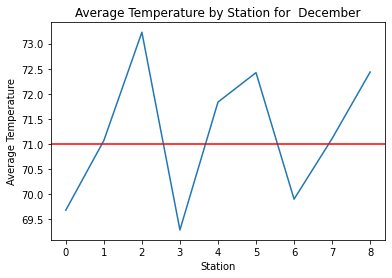

<Figure size 432x288 with 0 Axes>

In [16]:
dec_temp_station = []

dec_temp_station = session.query(Measurement.station, func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
group_by(Measurement.station).filter(extract('month', Measurement.date)==12).all()


# Save the query results as a Pandas DataFrame and set the index to the date column

dec_temp_station_df = pd.DataFrame(dec_temp_station, columns = ['station','minimum temp', 'maximum temp', 'average temp'])

print(dec_temp_station_df)

x_axis = np.arange(len(dec_temp_station_df))
plt.plot(x_axis, dec_temp_station_df['average temp'])
plt.xlabel("Station")
plt.ylabel("Average Temperature")
plt.title ("Average Temperature by Station for  December")

plt.axhline(y=71, color='r', linestyle='-')

plt.show()

plt.savefig("Resources/Station_Temp_Dec")

#plt.close()

       station  minimum precip  maximum precip  average precip
0  USC00511918             0.0            0.58        0.015157
1  USC00513117             0.0            4.43        0.118248
2  USC00514830             0.0            3.60        0.114192
3  USC00516128             0.0            2.80        0.495748
4  USC00517948             0.0            1.71        0.057975
5  USC00518838             0.0            0.82        0.094615
6  USC00519281             0.0            1.39        0.151525
7  USC00519397             0.0            0.89        0.022661
8  USC00519523             0.0            0.51        0.050044


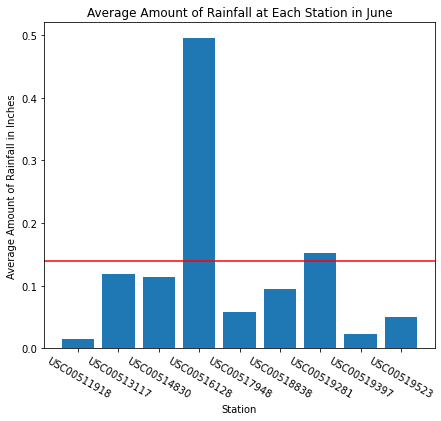

In [21]:
june_precip_station = []

june_precip_station = session.query(Measurement.station, func.min(Measurement.prcp), func.max(Measurement.prcp), func.avg(Measurement.prcp)).\
group_by(Measurement.station).filter(extract('month', Measurement.date)==6).all()

# Save the query results as a Pandas DataFrame and set the index to the date column

june_precip_station_df = pd.DataFrame(june_precip_station, columns = ['station','minimum precip', 'maximum precip', 'average precip'])

print(june_precip_station_df)
plt.figure(figsize=(7, 6))

plt.bar(june_precip_station_df['station'], june_precip_station_df['average precip'])
plt.xticks(rotation=-30)
plt.title("Average Amount of Rainfall at Each Station in June")
plt.xlabel('Station')
plt.ylabel ("Average Amount of Rainfall in Inches")
plt.axhline(y=0.14, color='r', linestyle='-')

plt.savefig("Resources/avg_station_precip_june.png")


       station  minimum precip  maximum precip  average precip
0  USC00511918            0.00            4.00        0.138146
1  USC00513117            0.00            4.94        0.203241
2  USC00514830            0.00            2.55        0.154966
3  USC00516128            0.00            6.42        0.507005
4  USC00517948            0.00            2.80        0.152727
5  USC00518838            0.02            2.50        0.638182
6  USC00519281            0.00            3.14        0.244931
7  USC00519397            0.00            2.01        0.075314
8  USC00519523            0.00            4.95        0.162010


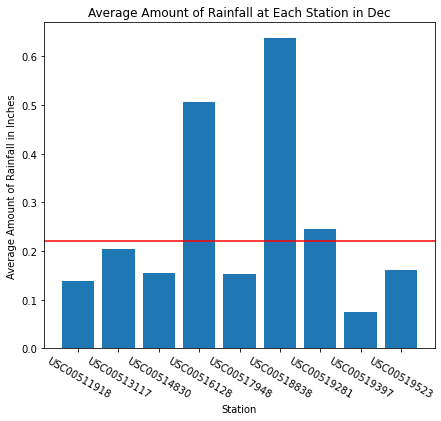

In [18]:
dec_precip_station = []

dec_precip_station = session.query(Measurement.station, func.min(Measurement.prcp), func.max(Measurement.prcp), func.avg(Measurement.prcp)).\
group_by(Measurement.station).filter(extract('month', Measurement.date)==12).all()

# Save the query results as a Pandas DataFrame and set the index to the date column

dec_precip_station_df = pd.DataFrame(dec_precip_station, columns = ['station','minimum precip', 'maximum precip', 'average precip'])

print(dec_precip_station_df)

plt.figure(figsize=(7, 6))
plt.bar(dec_precip_station_df['station'], dec_precip_station_df['average precip'])
plt.xticks(rotation=-30)
plt.title("Average Amount of Rainfall at Each Station in Dec")
plt.xlabel('Station')
plt.ylabel ("Average Amount of Rainfall in Inches")
plt.axhline(y=0.22, color='r', linestyle='-')
plt.savefig("Resources/avg_station_precip_dec.png")


